### Script testing the ability to seach PDF and use AI to parse out and standardize data in the PDF

Purpose: Extract the technical specifications from a given heavy machinery brocure and store the data.

Open and Ssearch PDF for the string "Technical specifications" and return the location of it

In [1]:
import os
import openai
import pdfplumber
import re
import pandas as pd

openai.api_key = "sk-uCplXmExxxxxxxxxxxxxxxxxxxxxxx7hXqhgWBbLaBj"
results = []

#Open File an search for "Technical specifications"
 
pdf_file = "Alimak-Scando-650-Brochure-w-max-lift-logo.pdf"
pattern = re.compile(r"Technical specifications", flags=re.IGNORECASE)
with pdfplumber.open(pdf_file) as pdf:
    pages = pdf.pages
    for page_nr, pg in enumerate(pages, 0):
        content = pg.extract_text()
        for match in pattern.finditer(content):
            print('Keyword:',match.group(), '|  Page:', page_nr, '| Location: ',content.index(match.group()))
            foundPageNum = page_nr

Keyword: TECHNICAL SPECIFICATIONS |  Page: 3 | Location:  765


### Render the page of the PDF the text was found on and what is visible to the computer.

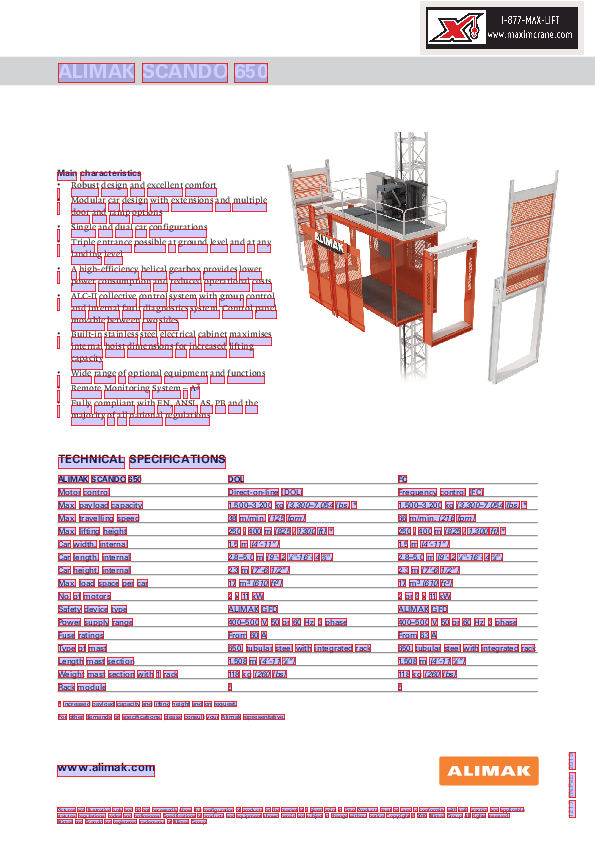

In [2]:
p0 = pdf.pages[foundPageNum]
im = p0.to_image()
im.draw_rects(p0.extract_words())

### Dump entire page text to variable

In [3]:
table_page = pdf.pages[foundPageNum]
testouput01 = table_page.extract_text_simple(x_tolerance=3, y_tolerance=3)
#testouput01 = table_page.extract_text(x_tolerance=3, y_tolerance=3, layout=False, x_density=7.25, y_density=13, main_group=0, return_groups=False)

testouput01

'ALIMAK SCANDO 650\nMain characteristics\n• Robust design and excellent comfort \n• Modular car design with extensions and multiple\ndoor and ramp options\n• Single and dual car configurations \n• Triple entrance possible at ground level and at any\nlanding level\n• A high-efficiency helical gearbox provides lower\npower consumption and reduced operational costs\n• ALC-II collective control system with group control\nand internal fault diagnostics system. Control panel\nmovable between two sides \n• Built-in stainless steel electrical cabinet maximises\ninternal hoist dimensions for increased lifting\ncapacity \n• Wide range of optional equipment and functions\n• Remote Monitoring System — A3\n• Fully compliant with EN, ANSI, AS, PB and the\nmajority of all national regulations\nTECHNICAL SPECIFICATIONS\nALIMAK SCANDO 650 DOL FC\nMotor control Direct-on-line (DOL) Frequency control (FC)\nMax. payload capacity 1,500–3,200 kg (3,300–7,054 lbs) * 1,500–3,200 kg (3,300–7,054 lbs) *\nMax. t

### Send all the text on the page of the PDF to OpenAI to parse out the techinical specifications

In [4]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt=f"Please extract all mechanical measurment contianing numbers into the table format [section | Spec] from the input text.\n\n\"\"\"{testouput01}\"\"\"",
  temperature=0.7,
  max_tokens=3000,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

output = response.choices[0].text.split('\n')
output

['',
 '',
 'Section | Spec',
 'Motor control | Direct-on-line (DOL) Frequency control (FC)',
 'Max. payload capacity | 1,500–3,200 kg (3,300–7,054 lbs) * 1,500–3,200 kg (3,300–7,054 lbs) *',
 'Max. travelling speed | 38 m/min. (125 fpm) 66 m/min.(216 fpm)',
 'Max. lifting height | 250 / 400 m (825 / 1300 ft) * 250 / 400 m (825 / 1,300 ft) *',
 'Car width, internal | 1.5 m (4’-11”)',
 'Car length, internal | 2.8–5.0 m (9\'- 2 1⁄4"-16\'- 4 3⁄4")',
 'Car height, internal | 2.3 m (7’-6 1/2”)',
 'Max. load space per car | 17 m3(610 ft3)',
 'No. of motors | 2 x 11 kW 2 or 3 x 11 kW',
 'Safety device type | ALIMAK GFD ',
 'Power supply range | 400–500 V, 50 or 60 Hz, 3 phase',
 'Fuse ratings | From 60 A',
 'Type of mast | 650, tubular steel with integrated rack',
 'Length mast section | 1.508 m (4’-11 3⁄8”)',
 'Weight mast section with 1 rack | 118 kg (260 lbs)',
 'Rack module | 5']

### Convert returned parse data to dataframe

In [5]:
for row in output:
    temp = row.split('|')
    results.append(temp)
output_df = pd.DataFrame(results,columns = ['Section', 'Spec'])
output_df

,Section,Spec
0,,None
1,,None
2,Section,Spec
3,Motor control,Direct-on-line (DOL) Frequency control (FC)
4,Max. payload capacity,"1,500–3,200 kg (3,300–7,054 lbs) * 1,500–3,20..."
5,Max. travelling speed,38 m/min. (125 fpm) 66 m/min.(216 fpm)
6,Max. lifting height,250 / 400 m (825 / 1300 ft) * 250 / 400 m (82...
7,"Car width, internal",1.5 m (4’-11”)
8,"Car length, internal","2.8–5.0 m (9'- 2 1⁄4""-16'- 4 3⁄4"")"
9,"Car height, internal",2.3 m (7’-6 1/2”)
